In [1]:
install.packages("ROCR")

Installing package into 'C:/Users/acorn/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependencies 'bitops', 'gtools', 'gdata', 'caTools', 'gplots'



package 'bitops' successfully unpacked and MD5 sums checked
package 'gtools' successfully unpacked and MD5 sums checked
package 'gdata' successfully unpacked and MD5 sums checked
package 'caTools' successfully unpacked and MD5 sums checked
package 'gplots' successfully unpacked and MD5 sums checked
package 'ROCR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\acorn\AppData\Local\Temp\RtmpSywi0u\downloaded_packages


In [2]:
library(ROCR)

Warning message:
"package 'ROCR' was built under R version 3.6.3"Loading required package: gplots
Warning message:
"package 'gplots' was built under R version 3.6.3"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



### 참조
http://www.dodomira.com/2016/02/12/logistic-regression-in-r/

In [3]:
total1 <- read.csv("C:/Users/acorn/Desktop/work/Project/전처리/1번설문/comp1.csv")

In [4]:
str(total1)

'data.frame':	117 obs. of  13 variables:
 $ X          : int  0 1 2 3 4 5 6 7 8 9 ...
 $ sex        : Factor w/ 2 levels "Female","Male": 2 1 1 1 1 1 1 2 1 1 ...
 $ age_class  : int  20 20 20 20 20 20 20 20 20 20 ...
 $ definition : Factor w/ 2 levels "bright","harmony": 2 1 1 2 1 2 2 2 2 1 ...
 $ need       : Factor w/ 2 levels "bright","harmony": 2 2 1 2 1 2 2 2 2 1 ...
 $ purpose    : Factor w/ 3 levels "clothes","cosmetic",..: 1 1 1 1 3 3 3 1 1 1 ...
 $ interest   : int  5 5 3 3 4 2 5 3 4 4 ...
 $ comp       : int  0 1 0 0 0 0 1 1 1 0 ...
 $ triangle1  : int  5 1 4 5 2 4 4 1 4 5 ...
 $ triangle2  : int  2 2 1 4 1 1 5 3 1 2 ...
 $ doubleness1: int  3 2 2 5 1 2 3 1 1 2 ...
 $ doubleness2: int  2 3 1 4 2 2 3 5 2 1 ...
 $ doubleness3: int  2 2 2 1 2 2 3 5 2 5 ...


In [5]:
head(total1)

X,sex,age_class,definition,need,purpose,interest,comp,triangle1,triangle2,doubleness1,doubleness2,doubleness3
0,Male,20,harmony,harmony,clothes,5,0,5,2,3,2,2
1,Female,20,bright,harmony,clothes,5,1,1,2,2,3,2
2,Female,20,bright,bright,clothes,3,0,4,1,2,1,2
3,Female,20,harmony,harmony,clothes,3,0,5,4,5,4,1
4,Female,20,bright,bright,etc,4,0,2,1,1,2,2
5,Female,20,harmony,harmony,etc,2,0,4,1,2,2,2


In [6]:
total1[is.na(total1)] <- 0
total1

X,sex,age_class,definition,need,purpose,interest,comp,triangle1,triangle2,doubleness1,doubleness2,doubleness3
0,Male,20,harmony,harmony,clothes,5,0,5,2,3,2,2
1,Female,20,bright,harmony,clothes,5,1,1,2,2,3,2
2,Female,20,bright,bright,clothes,3,0,4,1,2,1,2
3,Female,20,harmony,harmony,clothes,3,0,5,4,5,4,1
4,Female,20,bright,bright,etc,4,0,2,1,1,2,2
5,Female,20,harmony,harmony,etc,2,0,4,1,2,2,2
6,Female,20,harmony,harmony,etc,5,1,4,5,3,3,3
7,Male,20,harmony,harmony,clothes,3,1,1,3,1,5,5
8,Female,20,harmony,harmony,clothes,4,1,4,1,1,2,2
9,Female,20,bright,bright,clothes,4,0,5,2,2,1,5


In [7]:
result <- glm(comp ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total1)

summary(result)


Call:
glm(formula = comp ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4567  -0.9487  -0.7770   1.1757   1.9904  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)        -2.6520     0.9881  -2.684  0.00728 **
sexMale             0.2046     0.5655   0.362  0.71748   
definitionharmony   0.7894     0.5585   1.414  0.15748   
needharmony         0.3763     0.4622   0.814  0.41554   
purposecosmetic     0.3975     0.6037   0.659  0.51020   
purposeetc          0.5517     0.5232   1.054  0.29168   
interest            0.2732     0.2094   1.305  0.19197   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 154.93  on 116  degrees of freedom
Residual deviance: 147.83  on 110  degrees of freedom
AIC: 161.83

Number of Fisher Scoring iterations: 4


# Train, Test 나눠서

In [8]:
train<-total1[1:80, ]
test<-total1[81:117, ]
model <- glm(comp ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


Call:
glm(formula = comp ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3095  -0.9706  -0.6379   1.0568   1.9336  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -2.99701    1.23016  -2.436   0.0148 *
sexMale           -0.66076    0.72466  -0.912   0.3619  
definitionharmony  0.14154    0.68376   0.207   0.8360  
needharmony        1.23770    0.62295   1.987   0.0469 *
purposecosmetic   -0.22000    0.74391  -0.296   0.7674  
purposeetc        -0.09704    0.62673  -0.155   0.8769  
interest           0.50504    0.26692   1.892   0.0585 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 106.819  on 79  degrees of freedom
Residual deviance:  97.222  on 73  degrees of freedom
AIC: 111.22

Number of Fisher Scoring iterations: 4


In [9]:
anova(model, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,79,106.81867,NA
sex,1,0.10958545,78,106.70908,0.74061659
definition,1,1.21510424,77,105.49398,0.27032359
need,1,4.36617656,76,101.12780,0.03665916
purpose,2,0.03175402,74,101.09605,0.98424836
interest,1,3.87402879,73,97.22202,0.04903867


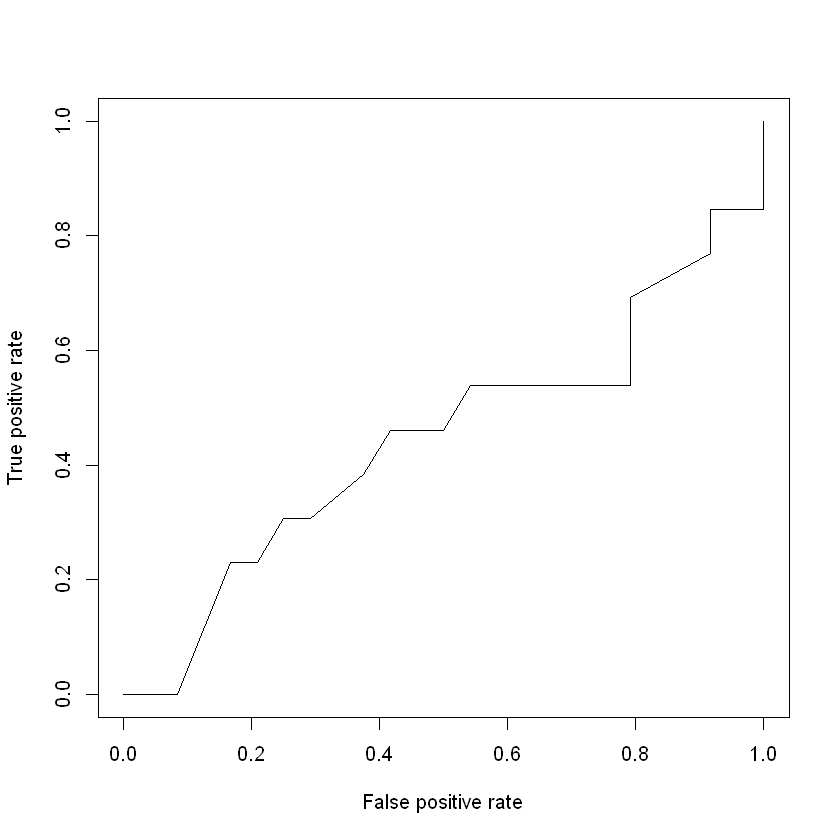

In [10]:
 p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
 plot(prf)

In [11]:
total1_1 <- read.csv("C:/Users/acorn/Desktop/work/Project/전처리/1번설문/comp1,123~45.csv")
total1_1[is.na(total1_1)] <- 0

result <- glm(comp ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total1_1)

summary(result)


Call:
glm(formula = comp ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total1_1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3605  -0.9499  -0.7651   1.2106   2.0179  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)        -2.3930     0.8666  -2.761  0.00575 **
sexMale             0.1657     0.5630   0.294  0.76856   
definitionharmony   0.8170     0.5621   1.454  0.14608   
needharmony         0.3390     0.4640   0.731  0.46505   
purposecosmetic     0.3206     0.6074   0.528  0.59763   
purposeetc          0.4984     0.5262   0.947  0.34364   
interest            0.4968     0.4074   1.219  0.22270   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 154.93  on 116  degrees of freedom
Residual deviance: 148.07  on 110  degrees of freedom
AIC: 162.07

Number of Fisher Scoring iterations: 4


In [12]:
total1_2 <- read.csv("C:/Users/acorn/Desktop/work/Project/전처리/1번설문/comp1,12~345.csv")
total1_2[is.na(total1_2)] <- 0

result <- glm(comp ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total1_2)

summary(result)


Call:
glm(formula = comp ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total1_2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3168  -0.9638  -0.7774   1.2180   1.9104  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -2.1477     1.2970  -1.656   0.0978 .
sexMale             0.2407     0.5735   0.420   0.6747  
definitionharmony   0.6924     0.5503   1.258   0.2083  
needharmony         0.4307     0.4638   0.928   0.3532  
purposecosmetic     0.4310     0.6008   0.717   0.4732  
purposeetc          0.6070     0.5202   1.167   0.2433  
interest            0.2494     0.5771   0.432   0.6656  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 154.93  on 116  degrees of freedom
Residual deviance: 149.38  on 110  degrees of freedom
AIC: 163.38

Number of Fisher Scoring iterations: 4


In [13]:
total2 <- read.csv("C:/Users/acorn/Desktop/work/Project/전처리/1번설문/comp2.csv")
total2[is.na(total2)] <- 0

result <- glm(comp ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total2)

summary(result)


Call:
glm(formula = comp ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0326  -0.6170  -0.4932  -0.4028   2.2593  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -0.06728    1.18021  -0.057   0.9545  
sexMale           -0.69792    0.69798  -1.000   0.3174  
definitionharmony -0.16100    0.64221  -0.251   0.8020  
needharmony       -0.74149    0.57985  -1.279   0.2010  
purposecosmetic   -1.05040    0.77278  -1.359   0.1741  
purposeetc        -1.12346    0.66204  -1.697   0.0897 .
interest          -0.09447    0.27838  -0.339   0.7343  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 103.806  on 116  degrees of freedom
Residual deviance:  98.236  on 110  degrees of freedom
AIC: 112.24

Number of Fisher Scoring iterations: 4


In [14]:
total3 <- read.csv("C:/Users/acorn/Desktop/work/Project/전처리/1번설문/comp3.csv")
total3[is.na(total3)] <- 0

result <- glm(comp ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total3)

summary(result)


Call:
glm(formula = comp ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0893  -0.5816  -0.4653  -0.2689   2.5839  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -0.2966     1.2504  -0.237   0.8125  
sexMale             0.4649     0.8459   0.550   0.5826  
definitionharmony  -1.3723     0.7342  -1.869   0.0616 .
needharmony         1.2195     0.7448   1.637   0.1015  
purposecosmetic     0.6589     0.9241   0.713   0.4758  
purposeetc          0.9204     0.7790   1.182   0.2374  
interest           -0.5730     0.2827  -2.027   0.0426 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 96.985  on 116  degrees of freedom
Residual deviance: 88.031  on 110  degrees of freedom
AIC: 102.03

Number of Fisher Scoring iterations: 5


In [15]:
total3_1 <- read.csv("C:/Users/acorn/Desktop/work/Project/전처리/1번설문/comp1,123~45.csv")
total3_1[is.na(total3_1)] <- 0

result <- glm(comp ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total3_1)

summary(result)


Call:
glm(formula = comp ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total3_1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3605  -0.9499  -0.7651   1.2106   2.0179  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)        -2.3930     0.8666  -2.761  0.00575 **
sexMale             0.1657     0.5630   0.294  0.76856   
definitionharmony   0.8170     0.5621   1.454  0.14608   
needharmony         0.3390     0.4640   0.731  0.46505   
purposecosmetic     0.3206     0.6074   0.528  0.59763   
purposeetc          0.4984     0.5262   0.947  0.34364   
interest            0.4968     0.4074   1.219  0.22270   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 154.93  on 116  degrees of freedom
Residual deviance: 148.07  on 110  degrees of freedom
AIC: 162.07

Number of Fisher Scoring iterations: 4


In [16]:
total3_2 <- read.csv("C:/Users/acorn/Desktop/work/Project/전처리/1번설문/comp1,12~345.csv")
total3_2[is.na(total3_2)] <- 0

result <- glm(comp ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total3_2)

summary(result)


Call:
glm(formula = comp ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total3_2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3168  -0.9638  -0.7774   1.2180   1.9104  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -2.1477     1.2970  -1.656   0.0978 .
sexMale             0.2407     0.5735   0.420   0.6747  
definitionharmony   0.6924     0.5503   1.258   0.2083  
needharmony         0.4307     0.4638   0.928   0.3532  
purposecosmetic     0.4310     0.6008   0.717   0.4732  
purposeetc          0.6070     0.5202   1.167   0.2433  
interest            0.2494     0.5771   0.432   0.6656  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 154.93  on 116  degrees of freedom
Residual deviance: 149.38  on 110  degrees of freedom
AIC: 163.38

Number of Fisher Scoring iterations: 4


In [17]:
total4 <- read.csv("C:/Users/acorn/Desktop/work/Project/전처리/1번설문/comp4.csv")
total4[is.na(total4)] <- 0

result <- glm(comp ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total4)

summary(result)


Call:
glm(formula = comp ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total4)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7146  -0.5324  -0.4385  -0.3868   2.3009  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -1.04464    1.35602  -0.770    0.441
sexMale           -0.09383    0.82817  -0.113    0.910
definitionharmony -0.10669    0.74220  -0.144    0.886
needharmony       -0.67301    0.66898  -1.006    0.314
purposecosmetic   -0.06521    0.85112  -0.077    0.939
purposeetc        -0.35550    0.78915  -0.450    0.652
interest          -0.12513    0.31718  -0.395    0.693

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 81.627  on 116  degrees of freedom
Residual deviance: 79.773  on 110  degrees of freedom
AIC: 93.773

Number of Fisher Scoring iterations: 5


In [18]:
total5 <- read.csv("C:/Users/acorn/Desktop/work/Project/전처리/1번설문/comp5.csv")
total5[is.na(total5)] <- 0

result <- glm(comp ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total5)

summary(result)


Call:
glm(formula = comp ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total5)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8382  -0.7006  -0.6405  -0.5667   1.9240  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -1.956505   1.096110  -1.785   0.0743 .
sexMale            0.108758   0.639242   0.170   0.8649  
definitionharmony  0.090458   0.606566   0.149   0.8814  
needharmony       -0.223015   0.526664  -0.423   0.6720  
purposecosmetic    0.005884   0.687705   0.009   0.9932  
purposeetc        -0.191209   0.606936  -0.315   0.7527  
interest           0.200127   0.245741   0.814   0.4154  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 118.74  on 116  degrees of freedom
Residual deviance: 117.75  on 110  degrees of freedom
AIC: 131.75

Number of Fisher Scoring iterations: 4


In [19]:
total <- read.csv("C:/Users/acorn/Desktop/work/Project/전처리/1번설문/change_bright.csv")

In [20]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [21]:
head(total)

X,sex,age_class,definition,need,purpose,interest,comp,triangle1,triangle2,doubleness1,doubleness2,doubleness3
0,Male,20,harmony,harmony,clothes,5,4,5,2,3,2,2
1,Female,20,bright,harmony,clothes,5,1,1,2,2,3,2
2,Female,20,bright,bright,clothes,3,2,4,1,2,1,2
3,Female,20,harmony,harmony,clothes,3,5,5,4,5,4,1
4,Female,20,bright,bright,etc,4,4,2,1,1,2,2
5,Female,20,harmony,harmony,etc,2,3,4,1,2,2,2


In [22]:
total$t1_1 <- case_when(
    total$triangle1 == 1 ~ 1,
    total$triangle1 != 1 ~ 0)

total$t1_2 <- case_when(
    total$triangle1 == 2 ~ 1,
    total$triangle1 != 2 ~ 0)

total$t1_3 <- case_when(
    total$triangle1 == 3 ~ 1,
    total$triangle1 != 3 ~ 0)

total$t1_4 <- case_when(
    total$triangle1 == 4 ~ 1,
    total$triangle1 != 4 ~ 0)

total$t1_5 <- case_when(
    total$triangle1 == 5 ~ 1,
    total$triangle1 != 5 ~ 0)

In [23]:
total$t2_1 <- case_when(
    total$triangle2 == 1 ~ 1,
    total$triangle2 != 1 ~ 0)

total$t2_2 <- case_when(
    total$triangle2 == 2 ~ 1,
    total$triangle2 != 2 ~ 0)

total$t2_3 <- case_when(
    total$triangle2 == 3 ~ 1,
    total$triangle2 != 3 ~ 0)

total$t2_4 <- case_when(
    total$triangle2 == 4 ~ 1,
    total$triangle2 != 4 ~ 0)

total$t2_5 <- case_when(
    total$triangle2 == 5 ~ 1,
    total$triangle2 != 5 ~ 0)

In [24]:
total$d1_1 <- case_when(
    total$doubleness1 == 1 ~ 1,
    total$doubleness1 != 1 ~ 0)

total$d1_2 <- case_when(
    total$doubleness1 == 2 ~ 1,
    total$doubleness1 != 2 ~ 0)

total$d1_3 <- case_when(
    total$doubleness1 == 3 ~ 1,
    total$doubleness1 != 3 ~ 0)

total$d1_4 <- case_when(
    total$doubleness1 == 4 ~ 1,
    total$doubleness1 != 4 ~ 0)

total$d1_5 <- case_when(
    total$doubleness1 == 5 ~ 1,
    total$doubleness1 != 5 ~ 0)

In [25]:
total$d2_1 <- case_when(
    total$doubleness2 == 1 ~ 1,
    total$doubleness2 != 1 ~ 0)

total$d2_2 <- case_when(
    total$doubleness2 == 2 ~ 1,
    total$doubleness2 != 2 ~ 0)

total$d2_3 <- case_when(
    total$doubleness2 == 3 ~ 1,
    total$doubleness2 != 3 ~ 0)

total$d2_4 <- case_when(
    total$doubleness2 == 4 ~ 1,
    total$doubleness2 != 4 ~ 0)

total$d2_5 <- case_when(
    total$doubleness2 == 5 ~ 1,
    total$doubleness2 != 5 ~ 0)

In [26]:
total$d3_1 <- case_when(
    total$doubleness3 == 1 ~ 1,
    total$doubleness3 != 1 ~ 0)

total$d3_2 <- case_when(
    total$doubleness3 == 2 ~ 1,
    total$doubleness3 != 2 ~ 0)

total$d3_3 <- case_when(
    total$doubleness3 == 3 ~ 1,
    total$doubleness3 != 3 ~ 0)

total$d3_4 <- case_when(
    total$doubleness3 == 4 ~ 1,
    total$doubleness3 != 4 ~ 0)

total$d3_5 <- case_when(
    total$doubleness3 == 5 ~ 1,
    total$doubleness3 != 5 ~ 0)

In [27]:
total

X,sex,age_class,definition,need,purpose,interest,comp,triangle1,triangle2,...,d2_1,d2_2,d2_3,d2_4,d2_5,d3_1,d3_2,d3_3,d3_4,d3_5
0,Male,20,harmony,harmony,clothes,5,4,5,2,...,0,1,0,0,0,0,1,0,0,0
1,Female,20,bright,harmony,clothes,5,1,1,2,...,0,0,1,0,0,0,1,0,0,0
2,Female,20,bright,bright,clothes,3,2,4,1,...,1,0,0,0,0,0,1,0,0,0
3,Female,20,harmony,harmony,clothes,3,5,5,4,...,0,0,0,1,0,1,0,0,0,0
4,Female,20,bright,bright,etc,4,4,2,1,...,0,1,0,0,0,0,1,0,0,0
5,Female,20,harmony,harmony,etc,2,3,4,1,...,0,1,0,0,0,0,1,0,0,0
6,Female,20,harmony,harmony,etc,5,1,4,5,...,0,0,1,0,0,0,0,1,0,0
7,Male,20,harmony,harmony,clothes,3,1,1,3,...,0,0,0,0,1,0,0,0,0,1
8,Female,20,harmony,harmony,clothes,4,1,4,1,...,0,1,0,0,0,0,1,0,0,0
9,Female,20,bright,bright,clothes,4,5,5,2,...,1,0,0,0,0,0,0,0,0,1


In [28]:
result <- glm(t1_1 ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total)

summary(result)

## 1번을 고른 남녀 비율은 비슷하나
## 2~5번을 고른 여성의 숫자가 매우많음


Call:
glm(formula = t1_1 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2988  -0.6902  -0.5412  -0.2790   2.4850  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -3.03157    1.25311  -2.419   0.0156 *
sexMale            1.40801    0.66994   2.102   0.0356 *
definitionharmony  1.08425    0.82780   1.310   0.1903  
needharmony        0.55031    0.58615   0.939   0.3478  
purposecosmetic    1.00597    0.74811   1.345   0.1787  
purposeetc         0.26936    0.71305   0.378   0.7056  
interest          -0.09288    0.24553  -0.378   0.7052  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 118.74  on 116  degrees of freedom
Residual deviance: 106.70  on 110  degrees of freedom
AIC: 120.7

Number of Fisher Scoring iterations: 5


In [29]:
result <- glm(t1_2 ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total)

summary(result)

# 표본이 적어서 답변수가 적은 경우에 맞을때가 많은듯


Call:
glm(formula = t1_2 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1685  -0.5350  -0.4014  -0.2468   2.6482  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)         0.3309     1.3596   0.243   0.8077   
sexMale            -0.2311     1.0210  -0.226   0.8209   
definitionharmony  -2.1143     0.7387  -2.862   0.0042 **
needharmony         0.6066     0.7180   0.845   0.3982   
purposecosmetic     1.1096     0.9357   1.186   0.2357   
purposeetc          0.8561     0.8210   1.043   0.2970   
interest           -0.5170     0.3100  -1.668   0.0953 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 93.372  on 116  degrees of freedom
Residual deviance: 79.296  on 110  degrees of freedom
AIC: 93.296

Number of Fisher Scoring iterations: 5


In [30]:
result <- glm(t1_3 ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total)

summary(result)


Call:
glm(formula = t1_3 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8894  -0.5712  -0.5557  -0.4559   2.1959  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -1.36193    1.20351  -1.132    0.258
sexMale           -0.04267    0.74535  -0.057    0.954
definitionharmony -0.98627    0.66219  -1.489    0.136
needharmony        0.58664    0.64276   0.913    0.361
purposecosmetic    0.24520    0.76895   0.319    0.750
purposeetc        -0.45932    0.71031  -0.647    0.518
interest           0.01041    0.27643   0.038    0.970

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 96.985  on 116  degrees of freedom
Residual deviance: 94.135  on 110  degrees of freedom
AIC: 108.14

Number of Fisher Scoring iterations: 4


In [31]:
result <- glm(t1_4 ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total)

summary(result)


Call:
glm(formula = t1_4 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4581  -0.9859  -0.7563   1.2777   1.8107  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -1.570153   0.955833  -1.643   0.1004  
sexMale           -0.540319   0.568291  -0.951   0.3417  
definitionharmony  1.064701   0.563556   1.889   0.0589 .
needharmony       -0.650033   0.465352  -1.397   0.1625  
purposecosmetic   -0.428711   0.601066  -0.713   0.4757  
purposeetc         0.006893   0.505712   0.014   0.9891  
interest           0.228958   0.212844   1.076   0.2821  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 153.88  on 116  degrees of freedom
Residual deviance: 148.01  on 110  degrees of freedom
AIC: 162.01

Number of Fisher Scoring iterations: 4


In [32]:
result <- glm(t1_5 ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total)

summary(result)


Call:
glm(formula = t1_5 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8842  -0.6089  -0.5306  -0.2885   2.4154  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -1.7278     1.2776  -1.352   0.1762  
sexMale            -0.8552     0.7610  -1.124   0.2611  
definitionharmony   0.4755     0.7323   0.649   0.5162  
needharmony        -0.4254     0.6249  -0.681   0.4960  
purposecosmetic    -1.9952     1.1300  -1.766   0.0774 .
purposeetc         -0.4285     0.6225  -0.688   0.4913  
interest            0.1287     0.2910   0.442   0.6583  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 96.985  on 116  degrees of freedom
Residual deviance: 91.881  on 110  degrees of freedom
AIC: 105.88

Number of Fisher Scoring iterations: 5


In [33]:
result <- glm(t2_1 ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total)

summary(result)


Call:
glm(formula = t2_1 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4441  -0.8035  -0.6447  -0.3189   2.2726  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)         0.8422     1.0612   0.794    0.427
sexMale            -1.2015     0.7466  -1.609    0.108
definitionharmony  -0.4496     0.5777  -0.778    0.436
needharmony        -0.1772     0.5204  -0.341    0.733
purposecosmetic     0.1594     0.6393   0.249    0.803
purposeetc         -0.1071     0.5657  -0.189    0.850
interest           -0.3935     0.2473  -1.591    0.112

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 128.77  on 116  degrees of freedom
Residual deviance: 121.40  on 110  degrees of freedom
AIC: 135.4

Number of Fisher Scoring iterations: 4


In [34]:
result <- glm(t2_2 ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total)

summary(result)


Call:
glm(formula = t2_2 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9343  -0.7598  -0.7115  -0.5565   1.9707  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -1.49365    1.04355  -1.431    0.152
sexMale           -0.19527    0.62115  -0.314    0.753
definitionharmony  0.34789    0.61673   0.564    0.573
needharmony        0.29399    0.51764   0.568    0.570
purposecosmetic    0.32453    0.63470   0.511    0.609
purposeetc        -0.16741    0.57661  -0.290    0.772
interest          -0.02519    0.22951  -0.110    0.913

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 128.77  on 116  degrees of freedom
Residual deviance: 126.79  on 110  degrees of freedom
AIC: 140.79

Number of Fisher Scoring iterations: 4


In [35]:
result <- glm(t2_3 ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total)

summary(result)


Call:
glm(formula = t2_3 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0700  -0.6793  -0.5982  -0.4619   2.1404  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -2.2606     1.1005  -2.054    0.040 *
sexMale             0.5092     0.6159   0.827    0.408  
definitionharmony  -0.1332     0.6153  -0.216    0.829  
needharmony         0.2203     0.5513   0.400    0.689  
purposecosmetic    -0.5540     0.7746  -0.715    0.474  
purposeetc         -0.2283     0.6051  -0.377    0.706  
interest            0.2546     0.2450   1.039    0.299  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 118.74  on 116  degrees of freedom
Residual deviance: 115.05  on 110  degrees of freedom
AIC: 129.05

Number of Fisher Scoring iterations: 4


In [36]:
result <- glm(t2_3 ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total)

summary(result)


Call:
glm(formula = t2_3 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0700  -0.6793  -0.5982  -0.4619   2.1404  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -2.2606     1.1005  -2.054    0.040 *
sexMale             0.5092     0.6159   0.827    0.408  
definitionharmony  -0.1332     0.6153  -0.216    0.829  
needharmony         0.2203     0.5513   0.400    0.689  
purposecosmetic    -0.5540     0.7746  -0.715    0.474  
purposeetc         -0.2283     0.6051  -0.377    0.706  
interest            0.2546     0.2450   1.039    0.299  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 118.74  on 116  degrees of freedom
Residual deviance: 115.05  on 110  degrees of freedom
AIC: 129.05

Number of Fisher Scoring iterations: 4


In [37]:
result <- glm(t2_4 ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total)

summary(result)


Call:
glm(formula = t2_4 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6804  -0.5999  -0.5562  -0.5190   2.0740  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -1.59621    1.20239  -1.328    0.184
sexMale           -0.13862    0.72827  -0.190    0.849
definitionharmony  0.07613    0.70621   0.108    0.914
needharmony        0.21842    0.61839   0.353    0.724
purposecosmetic   -0.22859    0.80580  -0.284    0.777
purposeetc         0.02571    0.65745   0.039    0.969
interest          -0.06956    0.26837  -0.259    0.795

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 100.46  on 116  degrees of freedom
Residual deviance: 100.01  on 110  degrees of freedom
AIC: 114.01

Number of Fisher Scoring iterations: 4


In [38]:
result <- glm(t2_5 ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total)

summary(result)


Call:
glm(formula = t2_5 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0098  -0.6326  -0.5350  -0.3965   2.1217  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -2.9254     1.2499  -2.341   0.0193 *
sexMale             0.9398     0.7307   1.286   0.1984  
definitionharmony   0.2674     0.6757   0.396   0.6923  
needharmony        -0.6316     0.5853  -1.079   0.2805  
purposecosmetic     0.1145     0.8563   0.134   0.8936  
purposeetc          0.6321     0.7135   0.886   0.3756  
interest            0.2620     0.2715   0.965   0.3346  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 103.806  on 116  degrees of freedom
Residual deviance:  99.861  on 110  degrees of freedom
AIC: 113.86

Number of Fisher Scoring iterations: 4


In [39]:
result <- glm(d1_1 ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total)

summary(result)


Call:
glm(formula = d1_1 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9546  -0.7616  -0.6086  -0.5179   2.0652  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -1.79215    1.07094  -1.673   0.0942 .
sexMale            0.54236    0.67715   0.801   0.4232  
definitionharmony -0.21867    0.58922  -0.371   0.7105  
needharmony       -0.12582    0.53446  -0.235   0.8139  
purposecosmetic    0.22017    0.76007   0.290   0.7721  
purposeetc         0.91696    0.62163   1.475   0.1402  
interest           0.06514    0.23566   0.276   0.7822  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 123.95  on 116  degrees of freedom
Residual deviance: 120.47  on 110  degrees of freedom
AIC: 134.47

Number of Fisher Scoring iterations: 4


In [40]:
result <- glm(d1_2 ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total)

summary(result)


Call:
glm(formula = d1_2 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3172  -0.9337  -0.7865   1.2430   1.9382  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)         0.7245     0.9487   0.764    0.445
sexMale            -0.8097     0.6009  -1.347    0.178
definitionharmony  -0.4299     0.5160  -0.833    0.405
needharmony        -0.4514     0.4614  -0.978    0.328
purposecosmetic    -0.2526     0.5973  -0.423    0.672
purposeetc         -0.2613     0.5157  -0.507    0.612
interest           -0.1492     0.2156  -0.692    0.489

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 148.94  on 116  degrees of freedom
Residual deviance: 143.32  on 110  degrees of freedom
AIC: 157.32

Number of Fisher Scoring iterations: 4


In [41]:
result <- glm(d1_3 ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total)

summary(result)

# 역시 답변이 매우 적은편


Call:
glm(formula = d1_3 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8392  -0.6532  -0.4739  -0.2750   2.3557  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -3.70919    1.45092  -2.556   0.0106 *
sexMale            0.44403    0.81285   0.546   0.5849  
definitionharmony  0.15517    0.87760   0.177   0.8597  
needharmony        1.71132    0.85844   1.994   0.0462 *
purposecosmetic    1.01785    0.87241   1.167   0.2433  
purposeetc         0.54713    0.77752   0.704   0.4816  
interest          -0.01885    0.28235  -0.067   0.9468  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 93.372  on 116  degrees of freedom
Residual deviance: 85.820  on 110  degrees of freedom
AIC: 99.82

Number of Fisher Scoring iterations: 5


In [42]:
result <- glm(d1_4 ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total)

summary(result)


Call:
glm(formula = d1_4 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9627  -0.7387  -0.4892  -0.3391   2.4019  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -1.930365   1.164900  -1.657   0.0975 .
sexMale            0.222431   0.623748   0.357   0.7214  
definitionharmony  0.721049   0.718396   1.004   0.3155  
needharmony        0.041545   0.544919   0.076   0.9392  
purposecosmetic    0.454161   0.650494   0.698   0.4851  
purposeetc        -0.905088   0.696886  -1.299   0.1940  
interest           0.002067   0.251627   0.008   0.9934  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 115.98  on 116  degrees of freedom
Residual deviance: 108.99  on 110  degrees of freedom
AIC: 122.99

Number of Fisher Scoring iterations: 5


In [43]:
result <- glm(d1_5 ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total)

summary(result)


Call:
glm(formula = d1_5 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.70227  -0.55124  -0.50721  -0.00014   2.19799  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)  
(Intercept)         -2.33508    1.40197  -1.666   0.0958 .
sexMale             -0.02289    0.75196  -0.030   0.9757  
definitionharmony    0.38841    0.81641   0.476   0.6342  
needharmony         -0.34653    0.70046  -0.495   0.6208  
purposecosmetic    -16.97917 1354.21675  -0.013   0.9900  
purposeetc          -0.36508    0.71226  -0.513   0.6083  
interest             0.16812    0.31637   0.531   0.5951  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 81.627  on 116  degrees of freedom
Residual deviance: 74.653  on 110  degrees of freedom
AIC: 88.653

Number of Fisher Scoring itera

In [44]:
result <- glm(d2_1 ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total)

summary(result)


Call:
glm(formula = d2_1 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2850  -0.9736  -0.8647   1.3471   1.6467  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -1.21720    0.91611  -1.329    0.184
sexMale            0.10980    0.55007   0.200    0.842
definitionharmony  0.50325    0.52416   0.960    0.337
needharmony       -0.51330    0.44982  -1.141    0.254
purposecosmetic    0.09129    0.58747   0.155    0.877
purposeetc         0.23651    0.50695   0.467    0.641
interest           0.14539    0.20438   0.711    0.477

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 154.93  on 116  degrees of freedom
Residual deviance: 152.75  on 110  degrees of freedom
AIC: 166.75

Number of Fisher Scoring iterations: 4


In [45]:
result <- glm(d2_2 ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total)

summary(result)


Call:
glm(formula = d2_2 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2466  -0.6575  -0.4897  -0.3413   2.3718  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        0.94903    1.15197   0.824   0.4100  
sexMale           -1.23372    0.75971  -1.624   0.1044  
definitionharmony -1.05780    0.62370  -1.696   0.0899 .
needharmony       -0.09542    0.59712  -0.160   0.8730  
purposecosmetic   -1.55932    0.87705  -1.778   0.0754 .
purposeetc        -0.80577    0.60108  -1.341   0.1801  
interest          -0.26260    0.27109  -0.969   0.3327  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 110.12  on 116  degrees of freedom
Residual deviance: 100.30  on 110  degrees of freedom
AIC: 114.3

Number of Fisher Scoring iterations: 5


In [46]:
result <- glm(d2_3 ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total)

summary(result)


Call:
glm(formula = d2_3 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2274  -0.6875  -0.3791  -0.1938   2.3476  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)       -4.10175    1.49157  -2.750  0.00596 **
sexMale            1.14850    0.87262   1.316  0.18813   
definitionharmony  0.27196    0.92045   0.295  0.76764   
needharmony        1.38638    0.89248   1.553  0.12033   
purposecosmetic   -0.20885    1.26998  -0.164  0.86938   
purposeetc         1.31995    0.84427   1.563  0.11795   
interest           0.01837    0.28567   0.064  0.94872   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 89.613  on 116  degrees of freedom
Residual deviance: 79.538  on 110  degrees of freedom
AIC: 93.538

Number of Fisher Scoring iterations: 6


In [47]:
result <- glm(d2_4 ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total)

summary(result)


Call:
glm(formula = d2_4 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0763  -0.6490  -0.5481  -0.4198   2.2240  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        -0.8062     1.1570  -0.697    0.486
sexMale            -0.8353     0.7610  -1.098    0.272
definitionharmony   0.4431     0.6869   0.645    0.519
needharmony        -0.1199     0.5590  -0.215    0.830
purposecosmetic     0.7244     0.6500   1.115    0.265
purposeetc         -0.3693     0.6508  -0.567    0.570
interest           -0.2419     0.2633  -0.919    0.358

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 113.11  on 116  degrees of freedom
Residual deviance: 106.36  on 110  degrees of freedom
AIC: 120.36

Number of Fisher Scoring iterations: 4


In [48]:
result <- glm(d2_5 ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total)

summary(result)


Call:
glm(formula = d2_5 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0014  -0.5365  -0.4395  -0.3913   2.4138  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -3.0269     1.3308  -2.274   0.0229 *
sexMale             1.0585     0.7577   1.397   0.1624  
definitionharmony  -0.4228     0.7230  -0.585   0.5587  
needharmony         0.3261     0.6630   0.492   0.6228  
purposecosmetic     0.4064     0.8779   0.463   0.6434  
purposeetc         -0.1355     0.8056  -0.168   0.8665  
interest            0.2426     0.2906   0.835   0.4038  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 89.613  on 116  degrees of freedom
Residual deviance: 85.650  on 110  degrees of freedom
AIC: 99.65

Number of Fisher Scoring iterations: 5


In [49]:
result <- glm(d3_1 ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total)

summary(result)


Call:
glm(formula = d3_1 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2540  -0.6273  -0.4135  -0.2748   2.2830  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -2.58211    1.34074  -1.926   0.0541 .
sexMale           -0.84168    0.89523  -0.940   0.3471  
definitionharmony  0.02721    0.66188   0.041   0.9672  
needharmony       -1.19658    0.59646  -2.006   0.0448 *
purposecosmetic    0.95266    0.70492   1.351   0.1766  
purposeetc        -0.55835    0.73700  -0.758   0.4487  
interest           0.44512    0.31191   1.427   0.1536  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 103.806  on 116  degrees of freedom
Residual deviance:  89.792  on 110  degrees of freedom
AIC: 103.79

Number of Fisher Scoring iterations: 5


In [50]:
result <- glm(d3_2 ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total)

summary(result)


Call:
glm(formula = d3_2 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9568  -0.7003  -0.6128  -0.2686   2.5302  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -0.5806     1.1171  -0.520   0.6032  
sexMale            -0.1046     0.6449  -0.162   0.8711  
definitionharmony  -0.1445     0.6729  -0.215   0.8300  
needharmony         0.5424     0.6187   0.877   0.3806  
purposecosmetic    -1.8420     1.1193  -1.646   0.0998 .
purposeetc         -0.1155     0.5897  -0.196   0.8447  
interest           -0.2456     0.2524  -0.973   0.3304  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 113.11  on 116  degrees of freedom
Residual deviance: 106.12  on 110  degrees of freedom
AIC: 120.12

Number of Fisher Scoring iterations: 5


In [51]:
result <- glm(d3_3 ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total)

summary(result)


Call:
glm(formula = d3_3 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9937  -0.7641  -0.6536  -0.4832   1.9182  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -2.2411     1.0769  -2.081   0.0374 *
sexMale             0.4137     0.6052   0.684   0.4942  
definitionharmony   0.6308     0.6299   1.001   0.3167  
needharmony        -0.2318     0.5166  -0.449   0.6537  
purposecosmetic    -0.3677     0.7163  -0.513   0.6077  
purposeetc          0.1127     0.5812   0.194   0.8462  
interest            0.1733     0.2343   0.740   0.4594  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 126.41  on 116  degrees of freedom
Residual deviance: 123.79  on 110  degrees of freedom
AIC: 137.79

Number of Fisher Scoring iterations: 4


In [52]:
result <- glm(d3_4 ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total)

summary(result)


Call:
glm(formula = d3_4 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6681  -0.6139  -0.5831  -0.5552   1.9935  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -1.38981    1.17040  -1.187    0.235
sexMale           -0.12806    0.72382  -0.177    0.860
definitionharmony -0.01689    0.66012  -0.026    0.980
needharmony       -0.16014    0.58103  -0.276    0.783
purposecosmetic    0.03597    0.75023   0.048    0.962
purposeetc        -0.02196    0.65569  -0.033    0.973
interest          -0.03229    0.26506  -0.122    0.903

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 103.81  on 116  degrees of freedom
Residual deviance: 103.62  on 110  degrees of freedom
AIC: 117.62

Number of Fisher Scoring iterations: 4


In [53]:
result <- glm(d3_5 ~ sex + definition + need + purpose 
              + interest, family=binomial, data=total)

summary(result)


Call:
glm(formula = d3_5 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = total)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0484  -0.8169  -0.7046   1.2482   2.0229  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        -0.8059     0.9910  -0.813    0.416
sexMale             0.2138     0.6216   0.344    0.731
definitionharmony  -0.5669     0.5777  -0.981    0.326
needharmony         0.7839     0.5385   1.456    0.145
purposecosmetic     0.4239     0.6692   0.633    0.526
purposeetc          0.3760     0.5733   0.656    0.512
interest           -0.1783     0.2217  -0.804    0.421

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 133.21  on 116  degrees of freedom
Residual deviance: 130.05  on 110  degrees of freedom
AIC: 144.05

Number of Fisher Scoring iterations: 4
